48000 [[-30 -37]
 [-42 -50]
 [-35 -42]
 ...
 [-31 -40]
 [-37 -46]
 [-30 -37]]


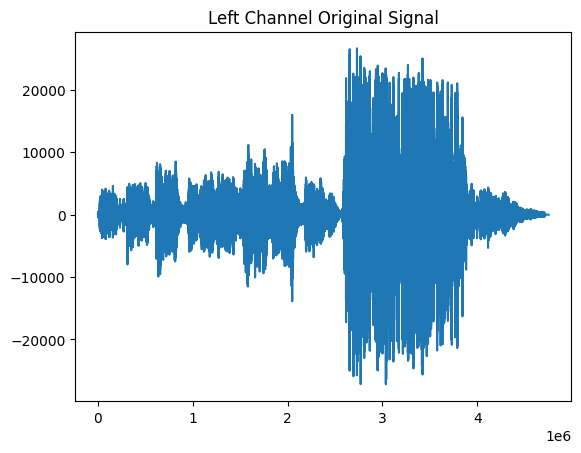

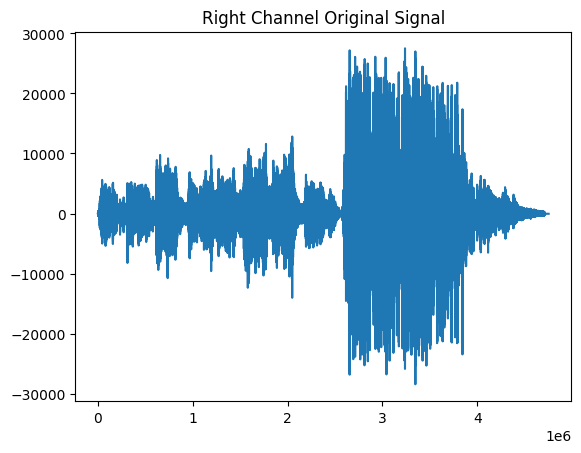

In [2]:
# %conda install -c conda-forge python-sounddevice , numpy , scipy , matplotlib
import numpy as np
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

import sounddevice as sd
# from matplotlib.font_manager import FontProperties
# font = FontProperties(fname='/path/to/your/font/SimHei.ttf', size=14)  # 请替换为你字体的真实路径和字体文件名

# 读取wav文件，得到采样率和数据

#win路径
# sample_rate, data = read('C:\\Users\\88486\\Desktop\\WorkSpace\\Python\\通信原理\\suno.wav') 

#linux路径
sample_rate, data = read('suno.wav') 

# 播放声音
# sd.play(data[:1], sample_rate)
# sd.wait()

# 打印采样率和数据
print(sample_rate,data)

# 绘制声音波形
data_left = data[:, 0]
data_right = data[:, 1]
plt.figure("左声道原始信号")
plt.title("Left Channel Original Signal")
plt.plot(np.arange(len(data[:,0])),data[:,0])
plt.figure("右声道原始信号")
plt.title("Right Channel Original Signal")
plt.plot(np.arange(len(data[:,1])),data[:,1])
plt.show()

# 创建载波信号
time = np.arange(len(data))/float(sample_rate)#载波时间
carrier_freq=sample_rate*2#载波频率


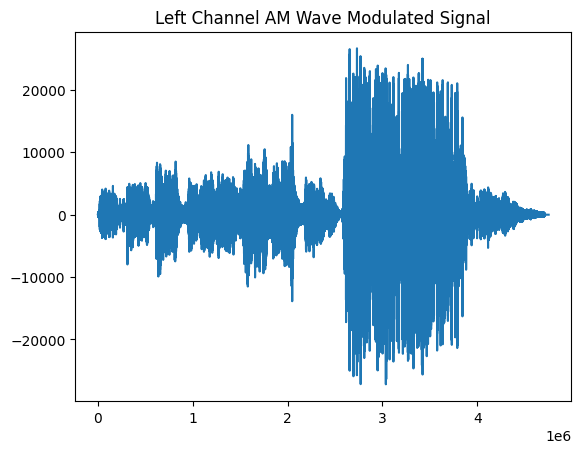

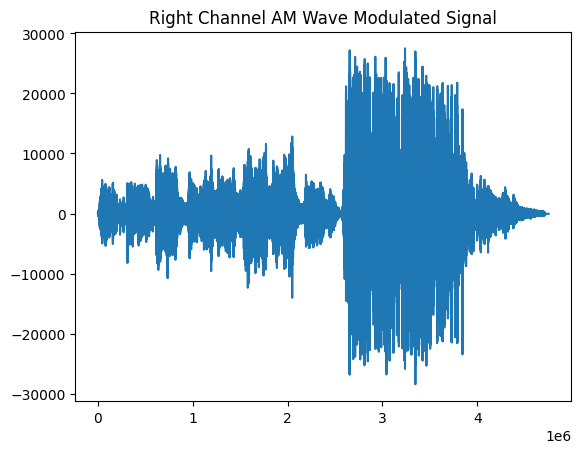

In [3]:
#产生载波信号
carrier = np.cos(2.0 * np.pi * carrier_freq * time)
modulated_data = np.empty_like(data)

# 左右声道调制
modulated_left=modulated_data[:, 0] = carrier * data[:, 0]#左声道调制
modulated_right=modulated_data[:, 1] = carrier * data[:, 1]#右声道调制
plt.figure("左声道AM波调制信号")
plt.title("Left Channel AM Wave Modulated Signal")
plt.plot(np.arange(len(modulated_left)),modulated_left)
plt.figure("右声道AM波调制信号")
plt.title("Right Channel AM Wave Modulated Signal")
plt.plot(np.arange(len(modulated_right)),modulated_right)
plt.show()


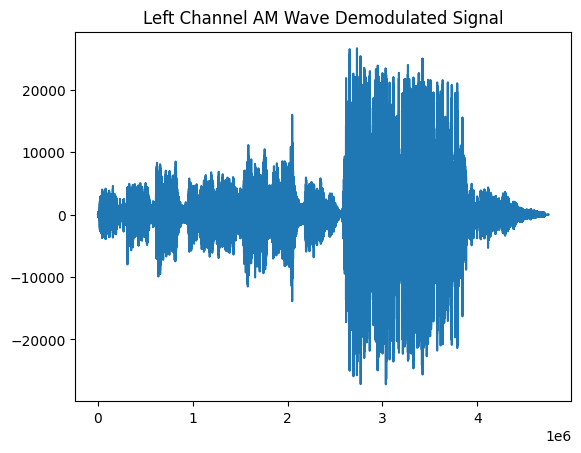

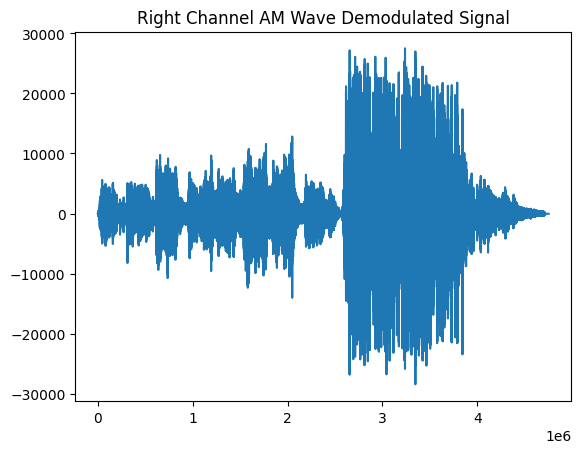

max(cha[:,0]):2
max(cha[:,1]):2
max(data[:,0]):26626
max(data[:,1]):27485
max(demodulated_data[:,0]):26626
max(demodulated_data[:,1]):27485
左声道解调成功
右声道解调成功


In [4]:
# 接下来对AM信号进行解调
# 生成解调信号
demodulated_data = np.empty_like(modulated_data)
demodulated_data[:, 0] = modulated_data[:, 0] * carrier#左声道解调
demodulated_data[:, 1] = modulated_data[:, 1] * carrier#右声道解调

# 绘制AM解调信号
plt.figure("左声道AM波解调信号")
plt.title("Left Channel AM Wave Demodulated Signal")
plt.plot(np.arange(len(demodulated_data[:, 0])),demodulated_data[:, 0])
plt.figure("右声道AM波解调信号")
plt.title("Right Channel AM Wave Demodulated Signal")
plt.plot(np.arange(len(demodulated_data[:, 1])),demodulated_data[:, 1])
plt.show()
# if(demodulated_data==data).all():
#     print("解调成功")
# else:
#     print("解调失败")

#判断是否解调成功
cha=demodulated_data-data
print("max(cha[:,0]):{}".format(max(cha[:,0])))
print(f"max(cha[:,1]):{max(cha[:,1])}")
print(f"max(data[:,0]):{max(data[:,0])}")
print(f"max(data[:,1]):{max(data[:,1])}")
print(f"max(demodulated_data[:,0]):{max(demodulated_data[:,0])}")
print(f"max(demodulated_data[:,1]):{max(demodulated_data[:,1])}")
if(max(cha[0])//max(data[:,0])<0.001):
    print("左声道解调成功")
else:
    print("左声道解调失败")

if(max(cha[1])//max(data[:,1])<0.001):
    print("右声道解调成功")
else:
    print("右声道解调失败")


# for i in range(0,len(data)):
# print(cha)
# sum_left=sum_right=0
# for i in range(0,len(cha)):
#     if cha[i][0]!=0:
#         sum_left+=1
#     if cha[i][1]!=0:
#         sum_right+=1
# print(f"sum_left:{sum_left}")
# print(f"sum_right:{sum_right}")

# if(demodulated_data[:,0]==data[:,0]).all():
#     print("左声道解调成功")
# else:
#     print("左声道解调失败")
# if(demodulated_data[:,1]==data[:,1]).all():
#     print("右声道解调成功")
# else:
#     print("右声道解调失败")

In [7]:
# 对AM信号进行DSB调制
# 分别对左右声道分别做DSB调制
# 消息信号
def message(t):
    return np.cos(2 * np.pi * t)
# 载波信号
def carrier(t, A, fc):
    return A * np.cos(2 * np.pi * fc * t)
# DSB调制
def dsb(t, A, fc):
    return message(t) * carrier(t, A, fc)

In [9]:
# mess=message(10000)
# car=carrier(10000,1,1000)
# dsb=dsb(10000,1,1000)
# plt.plot(np.arange(10000),dsb)
# plt.title("DSB Modulated Signal")
# plt.show()


TypeError: 'numpy.float64' object is not callable

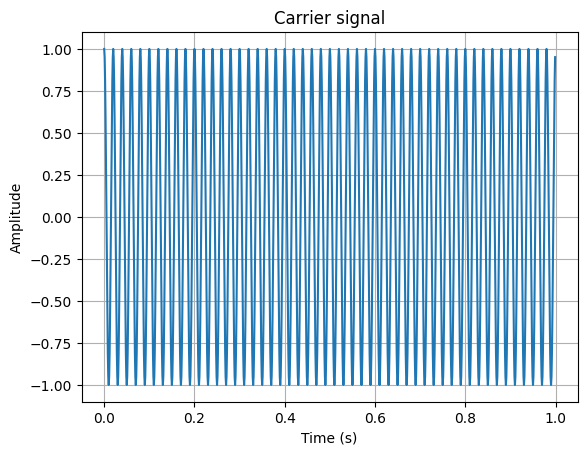